# Hello Stakeholders, in this page I will analyze the data for Airbnb in Dublin city and give you insights and information about the current state of housing in the city.

In [109]:
#Listings for 'Dublin, Leinster, Ireland'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Datasets\Airbnb\listings.csv')

In [110]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.291780,-6.257920,Private room,72,3,326,2024-03-18,2.06,2,129,50,NaN
1,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.292090,-6.256240,Private room,71,3,292,2024-03-18,1.87,2,45,56,NaN
2,159889,Friendly Single Room,766611,Marie,NaN,Dublin City,53.390270,-6.235470,Private room,52,2,421,2024-03-20,2.88,3,282,47,NaN
3,162809,5.5 miles south of Dublin City :^),777681,Robbie,NaN,Dn Laoghaire-Rathdown,53.283260,-6.191880,Private room,85,1,377,2024-03-15,3.51,2,81,43,NaN
4,165828,Pádraig Pearse apt. Kilmainham,790601,Timothy,NaN,Dublin City,53.337440,-6.323630,Entire home/apt,188,3,76,2023-12-28,0.50,4,222,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,1116663030517500158,Butterwell House,23112012,Pauline,NaN,Dn Laoghaire-Rathdown,53.218207,-6.227840,Entire home/apt,200,2,0,NaN,NaN,1,63,0,NaN
4730,1116740544881047841,cozy bedroom in dublin city center,380090355,Nitin,NaN,Dublin City,53.364411,-6.236525,Private room,75,1,0,NaN,NaN,1,87,0,NaN
4731,1116780304065032390,"Easy, Convenient, Clean, Relaxed",511357896,Michael,NaN,Fingal,53.373410,-6.370660,Private room,34,1,0,NaN,NaN,1,256,0,NaN
4732,1116842332960028519,"Room with Private Bathroom, by foot to Centre",568127279,Nicole,NaN,Dublin City,53.348960,-6.245890,Private room,96,1,0,NaN,NaN,1,55,0,NaN


## Before staring the analysis, some parts of the database are unnecessary/incomplete, so I will remove them.

In [111]:
#remove unnessecary / empty columns
df = df.drop(columns=['id', 'host_id', 'neighbourhood_group', 'license', 'number_of_reviews', 'last_review'])

#handle missing values
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

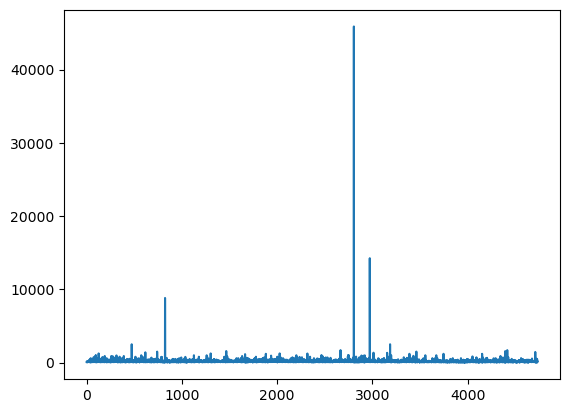

In [112]:
plt.plot('price', data=df)

## It seems like there are some outliers in the values, I will be removing them from the database as they can be harmful when calculating some values.

In [113]:
#remove price outliers
df = df[df['price'] <= 5000]

Text(0.5, 1.0, 'Average Price Box Plot')

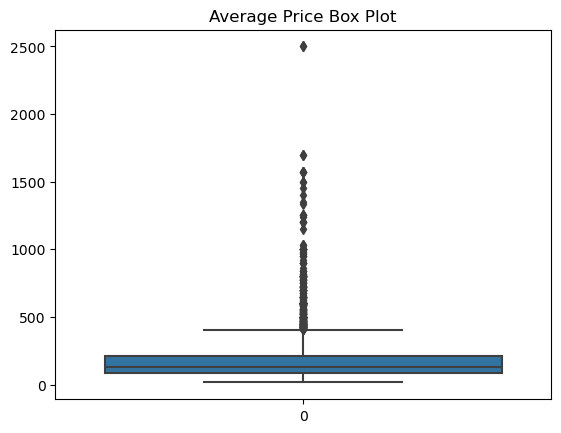

In [114]:
sns.boxplot(df['price'])
plt.title('Average Price Box Plot')

## From this box graph, we can see that the price range is large (from 100 to 2500+). However, it seems that the current price is ranges between 100-300.

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of listings for each room type')

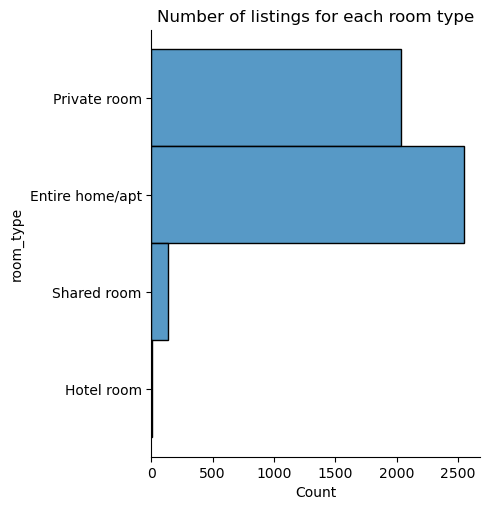

In [115]:
sns.displot(data=df, y='room_type')
plt.title('Number of listings for each room type')

### Most available rooms are either Private rooms, or full Apartment/House.

In [116]:
df['host_name'].value_counts()

host_name
Paul                113
Daniel And G         79
Ian                  59
David                51
Lucas                45
                   ... 
Kathy                 1
Zen                   1
Danièle And Noel      1
Qiuchen               1
Daoud                 1
Name: count, Length: 1497, dtype: int64

In [117]:
df['name'].count()

4731

## There are almost, 4731 properties, and almost 1500 property owners listed for Dublin city.
### at first glance this might look like most owners own multiple properties, but this is nor true.

Text(0.5, 1.0, 'properties per owner')

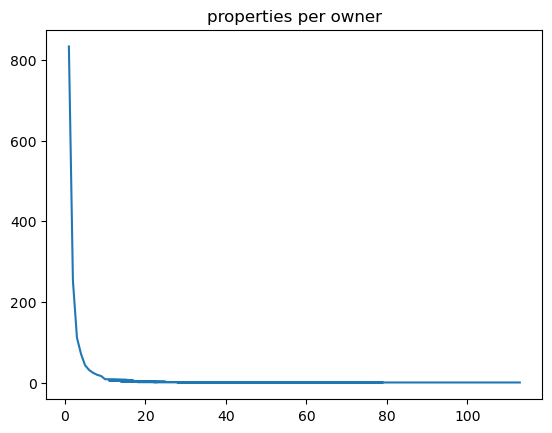

In [118]:
plt.plot(df['host_name'].value_counts().value_counts(), data=df)
plt.title('properties per owner')

### As shown in the graph above, most owners only own 1 to 2 properties, but there are a handful that own way more properties which can skew the data.
#### Below is a detailed list of the number of owned properties per owner.

In [119]:
df['host_name'].value_counts().value_counts()

count
1      833
2      253
3      112
4       72
5       44
6       32
7       25
8       20
9       17
10       9
12       9
15       8
17       6
11       6
16       6
13       5
20       4
25       3
14       3
19       3
23       2
22       2
27       2
29       2
24       2
18       2
21       2
79       1
28       1
30       1
31       1
36       1
38       1
42       1
43       1
44       1
45       1
51       1
59       1
113      1
Name: count, dtype: int64

### Here we can see some values distributed on somewhat realistic graphs.


Text(0.5, 1.0, 'Availabilty Distribution')

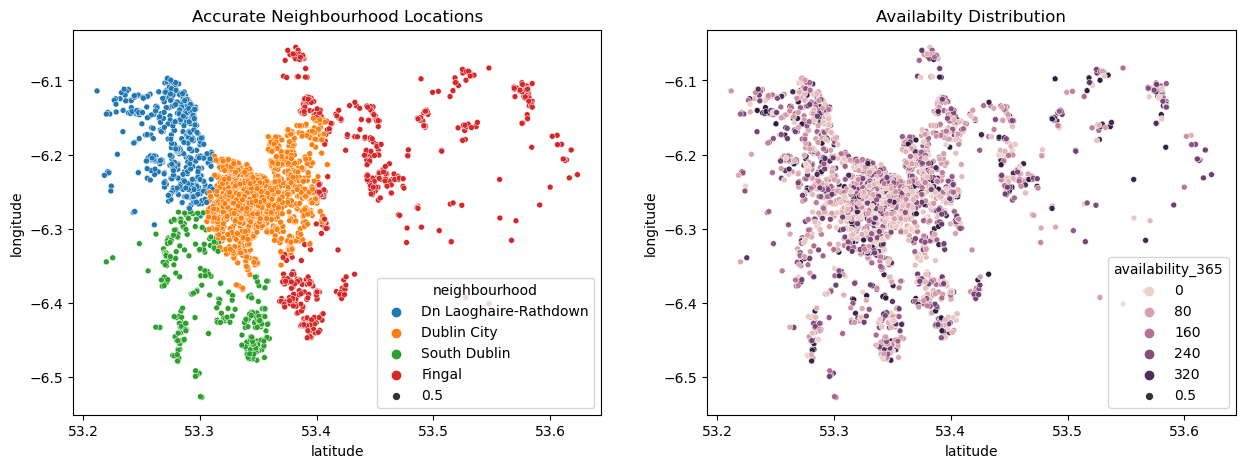

In [120]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=df, x='latitude', y='longitude', hue='neighbourhood', size=0.5, ax=axes[0])
axes[0].set_title('Accurate Neighbourhood Locations')
sns.scatterplot(data=df, x='latitude', y='longitude', hue='availability_365', size=0.5, ax=axes[1])
axes[1].set_title('Availabilty Distribution')

#### Here we can see that most properties are located in "Dublin City", while the other areas are less cluttered. Naturally, this means that competition is way higher in "Dublin City". From the availability graph, we can confirm that the availability of rooms **not** in "Dublin City" is way more, meaning less properties are being rented in those areas.

### So an apartment in Dublin City is sought after way more than one in areas like Fingal or South Dublin.

#### The following graph also confirms this:

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Number of listings in each neighbourhood')

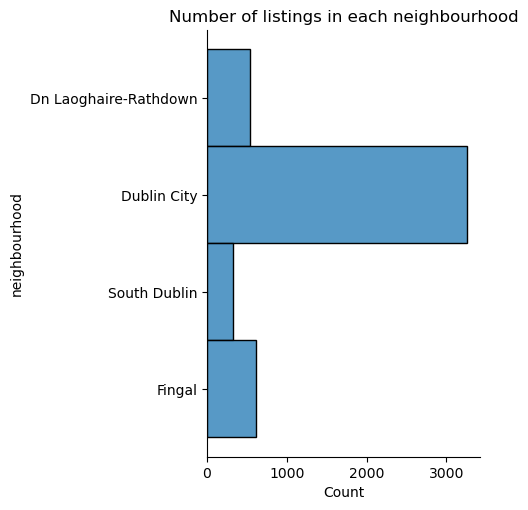

In [121]:
sns.displot(data=df, y='neighbourhood')
plt.title('Number of listings in each neighbourhood')

### As we can see, Dublin City alone has over 3000 listings.

Text(0.5, 1.0, 'Distribution of Prices')

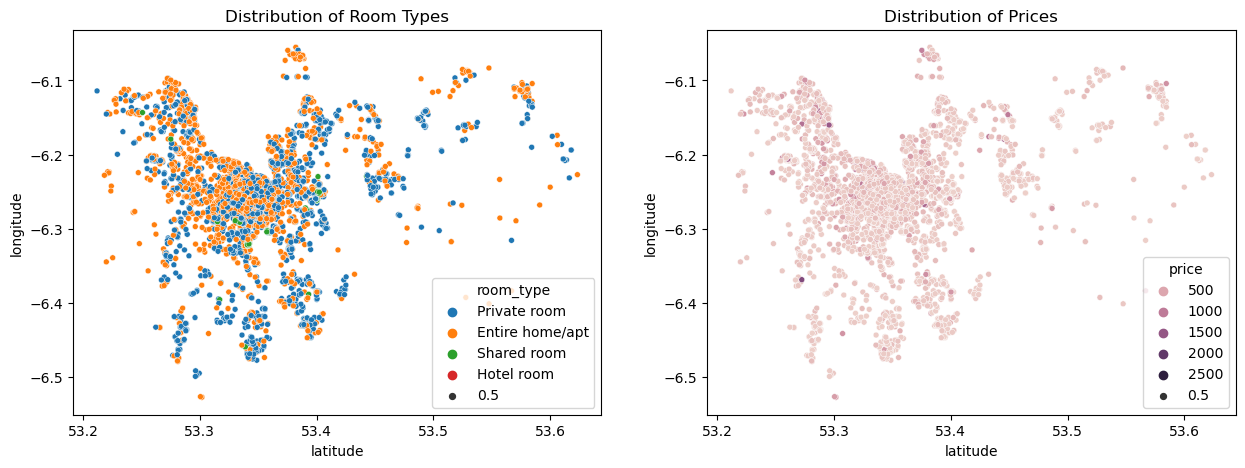

In [122]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=df, x='latitude', y='longitude', hue='room_type', size=0.5, ax=axes[0])
axes[0].set_title('Distribution of Room Types')
sns.scatterplot(data=df, x='latitude', y='longitude', hue='price', size=0.5, ax=axes[1])
axes[1].set_title('Distribution of Prices')

### Here we can see that an expected distribution of room types to be spread across all areas.

Text(0.5, 1.0, 'Average Price in each neighbourhood')

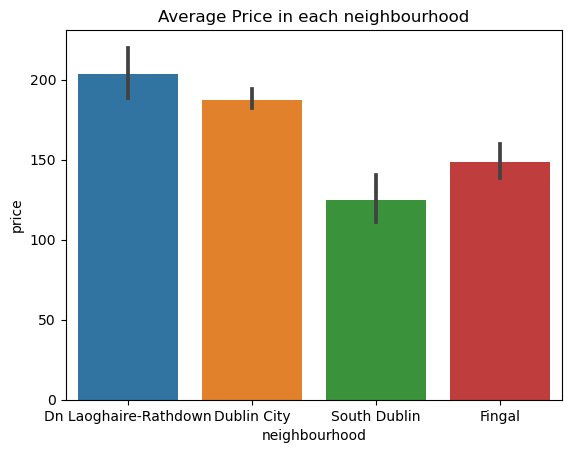

In [123]:
sns.barplot(data=df, x='neighbourhood', y='price')
plt.title('Average Price in each neighbourhood')

 ### The price seems to be a bit higher in Dn Laoghaire-Rathdown and Dublin City. While South Dublin is way lower, so a property in South Dublin is not very good.

Text(0.5, 1.0, 'Calculated Listings Count')

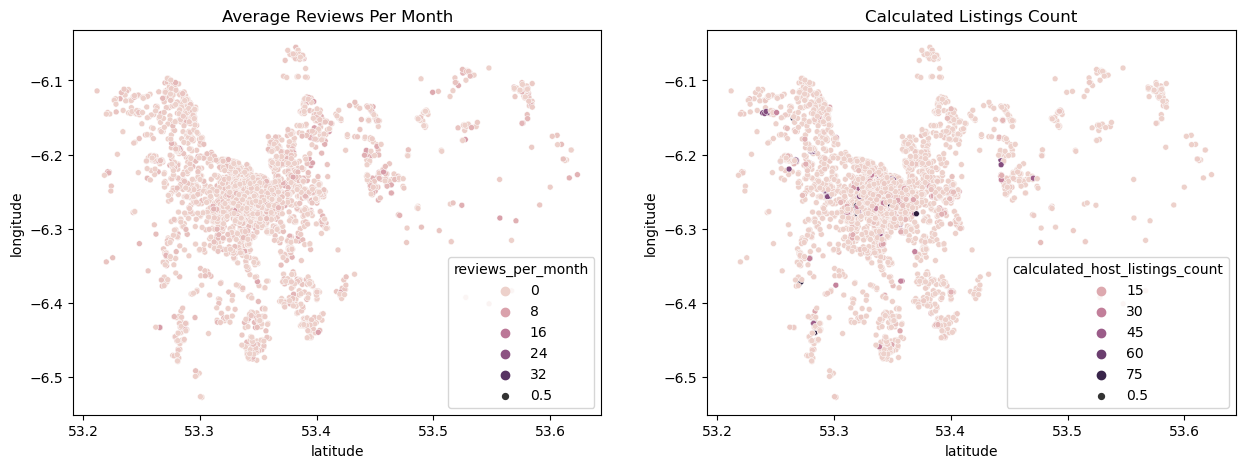

In [124]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=df, x='latitude', y='longitude', hue='reviews_per_month', size=0.5, ax=axes[0])
axes[0].set_title('Average Reviews Per Month')
sns.scatterplot(data=df, x='latitude', y='longitude', hue='calculated_host_listings_count', size=0.5, ax=axes[1])
axes[1].set_title('Calculated Listings Count')

Text(0.5, 1.0, 'Average Rooms Prices')

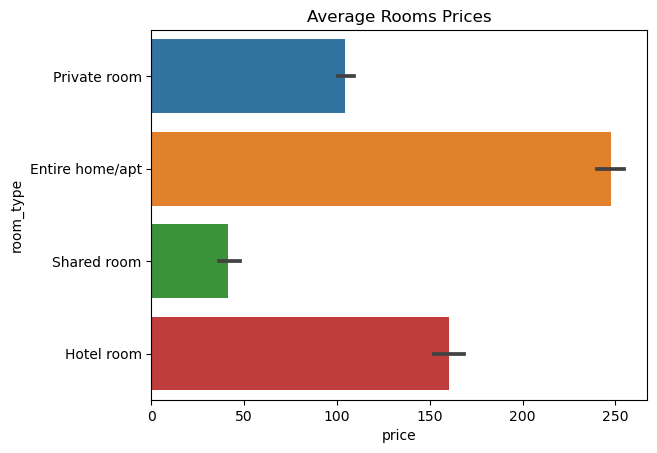

In [125]:
sns.barplot(data=df, y='room_type', x='price')
plt.title('Average Rooms Prices')

### Here we can see an expected ratio of pricing, as Entire Apartments are the most expensive, while Shared rooms are very cheap, and Hotel and Private rooms are around mid-range.

In [126]:
df.groupby(['room_type'])[['availability_365', 'minimum_nights']].describe()

availability_365                                              \
                           count        mean         std   min    25%    50%   
room_type                                                                      
Entire home/apt           2553.0  134.247944  107.661576   0.0   41.0  107.0   
Hotel room                   8.0  258.375000   80.889585  80.0  230.0  287.0   
Private room              2037.0  141.271969  110.177980   0.0   49.0  108.0   
Shared room                133.0  206.067669  103.630038   4.0   98.0  214.0   

                               minimum_nights                                 \
                    75%    max          count      mean        std  min  25%   
room_type                                                                      
Entire home/apt  214.00  365.0         2553.0  6.877791  22.076810  1.0  2.0   
Hotel room       310.25  326.0            8.0  1.000000   0.000000  1.0  1.0   
Private room     232.00  365.0         2037.0  4.363279  18.372499  1.0  1.0   
Shared room      291.00  364.0          133.0  3.263158   5.129969  1.0  1.0   

                                  
                 50%  75%    max  
room_type                         
Entire home/apt  3.0  6.0  729.0  
Hotel room       1.0  1.0    1.0  
Private room     2.0  2.0  365.0  
Shared room      1.0  4.0   30.0

#### Here we can see a comparison for availabilty and minimum nights, we can easily conclude that a higher minimum nights requirement corelates with less room availabilty.

This makes sense since fewer nights are required, which means that customers will stay for less on average, which makes the property available for longer periods of time

## From that analysis, I concluded a business plan that will help you make better more informed decisions, here it is: 

# Business Plan for Dublin Airbnb Market Analysis
---
## In analyzing the Airbnb data for Dublin city, several key insights have emerged that can guide strategic decisions for stakeholders in the short and long term.
---
#### The analysis revealed a diverse range of properties, with prices typically ranging between 100 to 300. Most available listings are either private rooms or full apartments/houses, indicating a preference among guests for these types of accommodations.

#### Despite the large number of properties (4731) and property owners (approximately 1500), it's notable that the majority of owners own only 1 to 2 properties. However, a small number of owners own multiple properties, which can skew market data and competition dynamics.

#### Location plays a significant role, with "Dublin City" having the highest concentration of listings and consequently higher competition. Properties outside this central area, such as in Fingal or South Dublin, experience lower competition and higher availability, presenting opportunities for strategic positioning, albiet with fewer interested customers.

#### Understanding room type preferences is crucial, as entire apartments command higher prices, while shared rooms are more budget-friendly. It mainly depens on how big your capital is and how many apartements you own/interested in owning.

#### Properties with higher minimum nights requirements tend to have lower availability but potentially longer booking periods. However, this correlation can be dangerous as it heavily depends on the type of property.
---
#### Strategic Recommendations:
#### - Keep your Price dynamic: Implement dynamic pricing strategies aligned with room type, location, and seasonal demand trends to maximize revenue.

#### - Enhanced customer experience: Invest in property quality and services to enhance its appeal and attract positive reviews.

#### - Targeted high-demand areas: Focus on high-demand areas like Dublin City while exploring niche markets in less crowded areas.

#### - Own different property types: Consider diversifying property types based on market demand and customer preferences to broaden appeal and increase profit long-term.
---
### In the end, While this Business plan is a good place to start, it is highly recommended to continuously monitor market trends, competitor strategies, and regulatory changes to adapt and stay competitive in the evolving Airbnb market.

`**Thank you for tuning in to my analysis**`